In [1]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
import pandas as pd
import numpy as np

In [2]:
# Load the test dataset
df = pd.read_csv("../data/processed/cleaned_churn.csv")

In [3]:
# Prepare features and target (same as training)
df.drop(columns=["customerid"], inplace=True, errors="ignore")
df["churn"] = df["churn"].str.strip().str.lower().map({"no": 0, "yes": 1})
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("churn", axis=1)
y = df_encoded["churn"]

In [4]:
# Split data for test set - you can load a saved test split or split here
from sklearn.model_selection import train_test_split
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
# Load models
logistic_model = joblib.load("../models/logistic_regression_model.joblib")
rf_model = joblib.load("../models/random_forest_model.joblib")
gb_model = joblib.load("../models/gradient_boosting_model.joblib")

models = {
    'Logistic Regression': logistic_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

In [6]:
# --- Plot ROC Curves ---
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 7))
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.title('ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

In [7]:
# --- Plot Feature Importance ---
def plot_feature_importance(model, X_train, model_name):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_).flatten()
    else:
        print(f"Feature importance not available for {model_name}")
        return
    
    features = X_train.columns
    indices = np.argsort(importances)[::-1][:15]  # top 15 features
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
    plt.title(f"Top 15 Feature Importances: {model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

In [8]:
# --- Plot Confusion Matrix Heatmap ---
def plot_confusion_matrix_heatmap(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [9]:
# --- Plot Churn Distribution ---
def plot_churn_distribution(df):
    plt.figure(figsize=(6,4))
    sns.countplot(x='churn', data=df)
    plt.title("Churn Distribution")
    plt.xticks(ticks=[0,1], labels=["No", "Yes"])
    plt.show()

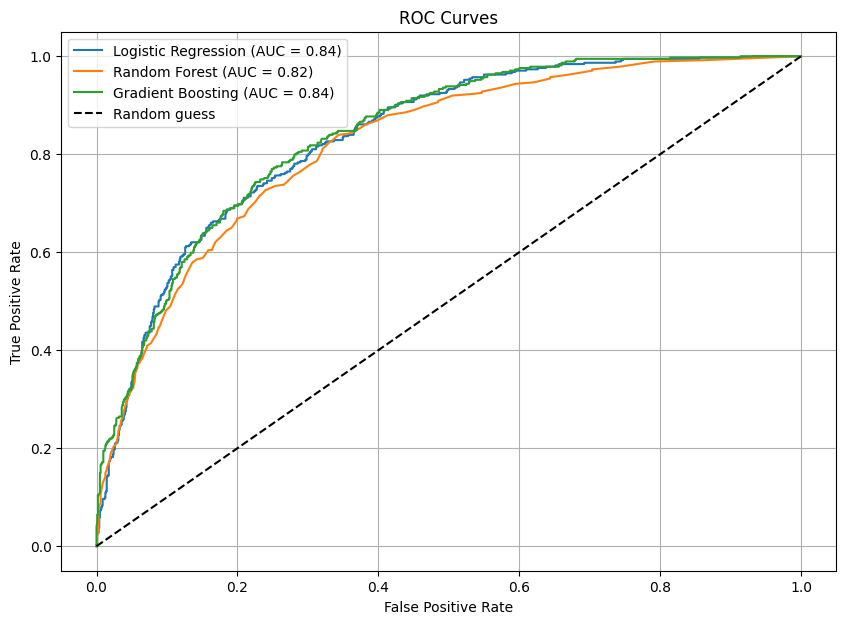

/var/folders/xp/y5m5671j71s_kss5gk4465qm0000gn/T/ipykernel_35074/734260852.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


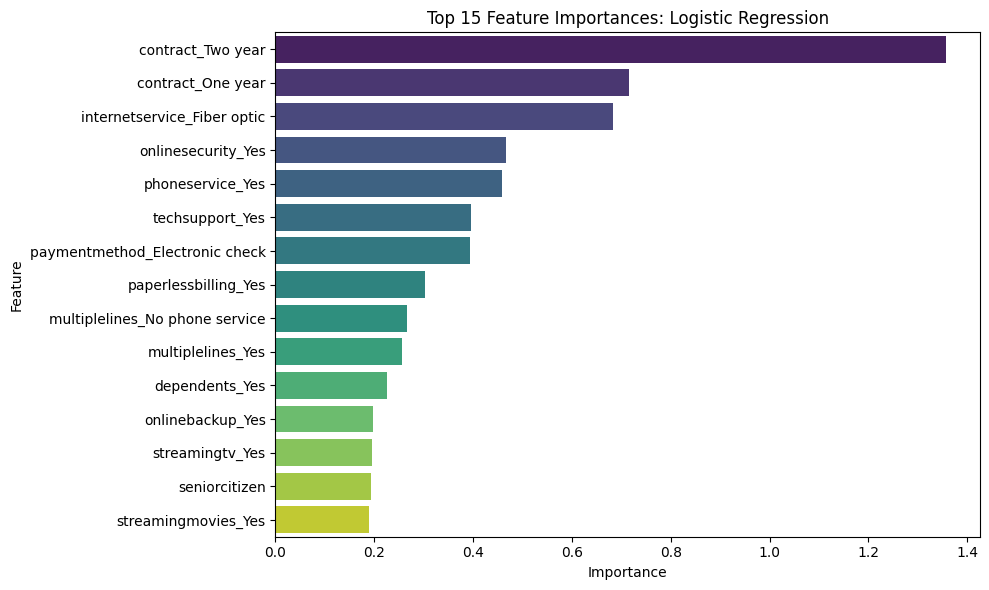

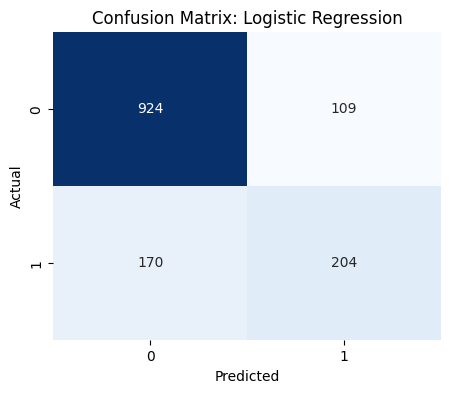

/var/folders/xp/y5m5671j71s_kss5gk4465qm0000gn/T/ipykernel_35074/734260852.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


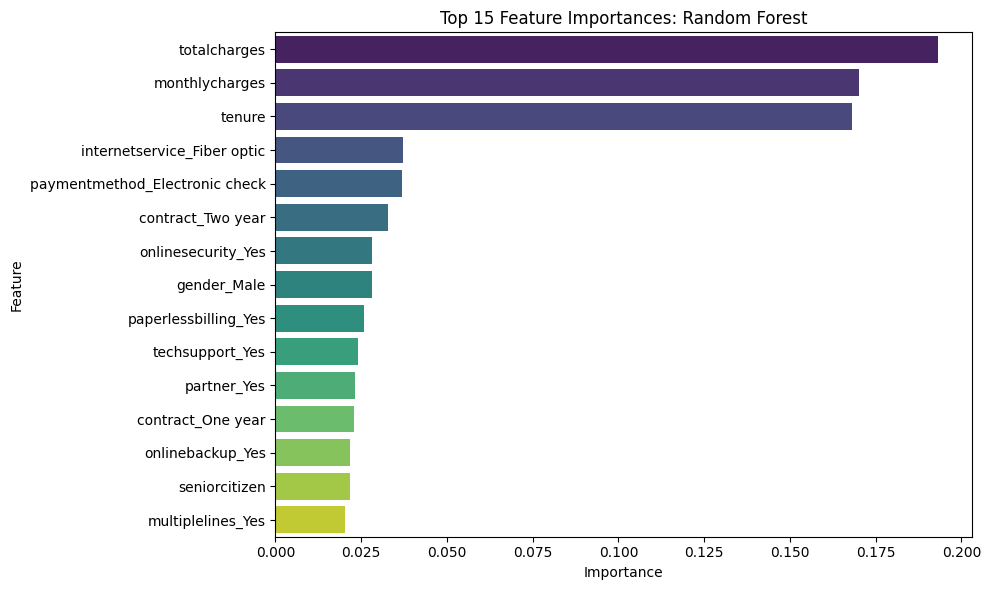

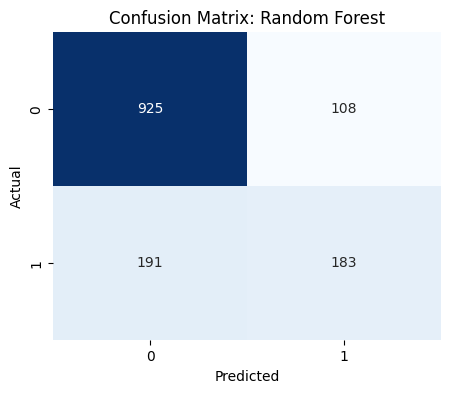

/var/folders/xp/y5m5671j71s_kss5gk4465qm0000gn/T/ipykernel_35074/734260852.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


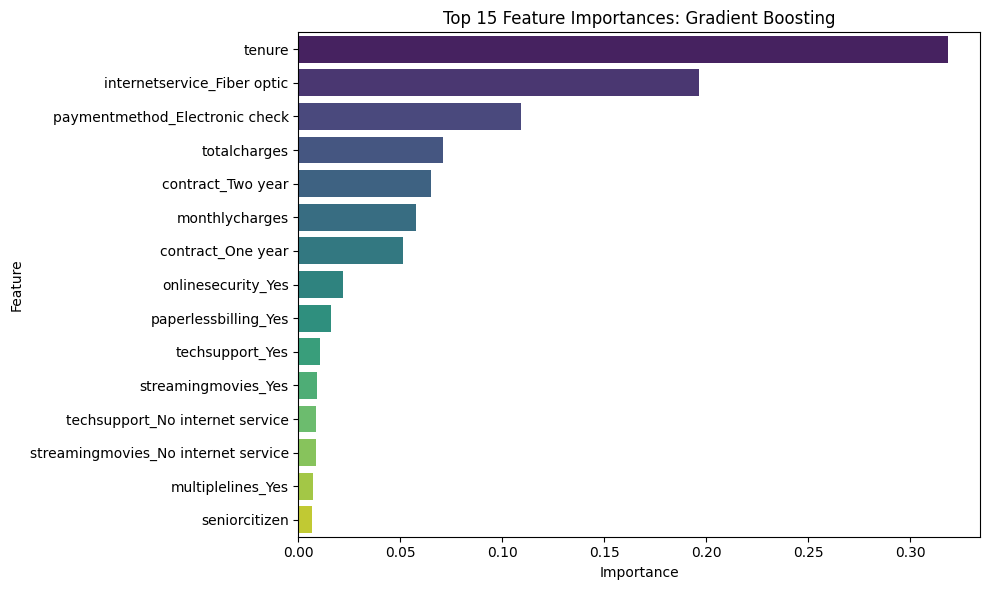

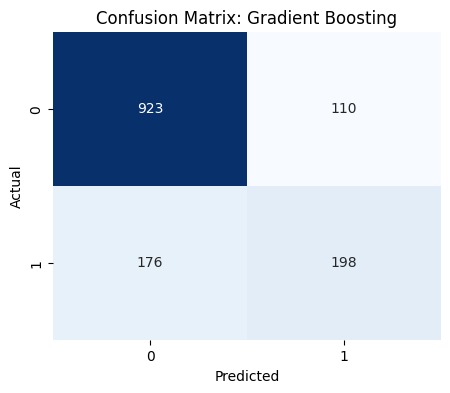

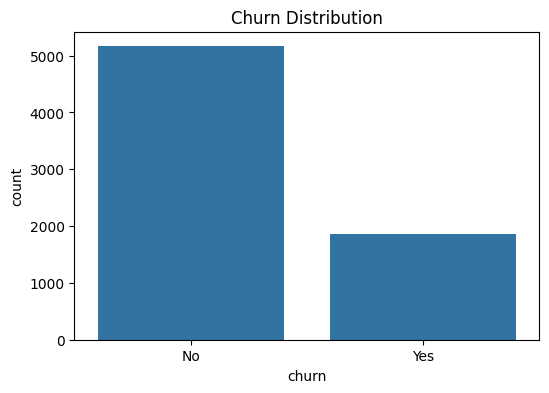

In [10]:
# Run all visualizations
plot_roc_curves(models, X_test, y_test)

for name, model in models.items():
    plot_feature_importance(model, X, name)
    y_pred = model.predict(X_test)
    plot_confusion_matrix_heatmap(y_test, y_pred, name)

plot_churn_distribution(df)